In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import minimize

sys.path.append('/Users/xiangshi/Documents/GitHub/pygh/')

from pygh.gig import GIG
from pygh.func import logkv

%matplotlib inline

In [2]:
g = GIG(lam=0.9, chi=0.3, psi=1.5)

In [3]:
n = int(1e5)
n_grids = int(1e5)
mu = g.moment(1)
z = np.r_[np.linspace(0., mu, n_grids+1)[1:],
        np.linspace(0., 1./mu, n_grids+1)[1:][::-1]**(-1)]
dz = np.diff(z)
z = z[1:] - dz/2
p = g.pdf(z)
p[0] = 0
p[p<0] = 0
y = np.cumsum(p*dz)
y = y/y[-1]
y[y>1] = 1
y[y<0] = 0
y, idx = np.unique(y, return_index=True)
z = z[idx]
invcdf = interp1d(y, z, kind='linear')
u = np.random.rand(n)
x = invcdf(u)

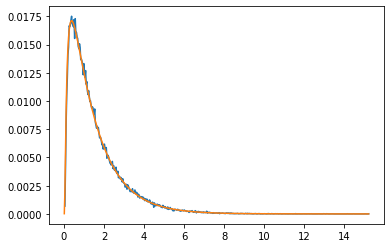

In [4]:
# x = g.rvs(int(1e5))
yhat, xi = np.histogram(x, bins=500)
p = g.pdf(xi)
p = p/np.sum(p)
plt.plot(xi[1:], yhat/1e5)
plt.plot(xi, p)

In [5]:
def logkvp(v, z):
    return -0.5*(np.exp(logkv(v+1, z)-logkv(v, z))+np.exp(logkv(v-1, z)-logkv(v, z)))

In [6]:
s2 = np.mean(x)
s1 = np.mean(x**(-1))
s3 = np.mean(np.log(x))

In [7]:
s1 = 0.3127893130513858
s2 = 6.180567062222285
s3 = 1.4941762114948172

In [8]:
gig_fit = GIG(0, 1, 1)

In [9]:
gig_fit.suffstats2param(s1, s2, s3)

      fun: 2.0172766924958583
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.63934552e-06, -8.12766030e-08, -2.06693236e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 23
      nit: 20
   status: 0
  success: True
        x: array([0.09181463, 4.65298631, 0.26519141])

In [ ]:
def llh(param):
    lam = param[0]
    chi = param[1]
    psi = param[2]
    eta = np.sqrt(chi*psi)
    delta = np.sqrt(chi/psi)
    l = 0.5*(chi*s1+psi*s2)-(lam-1)*s3+lam*np.log(delta)+logkv(lam, eta)
    return l

def grad(param):
    lam = param[0]
    chi = param[1]
    psi = param[2]
    eta = np.sqrt(chi*psi)
    delta = np.sqrt(chi/psi)
    g = np.array([-s3+np.log(delta)+(logkv(lam+1e-10, eta)-logkv(lam-1e-10, eta))/2e-10,
                  0.5*(s1+lam/chi+logkvp(lam, eta)/delta),
                  0.5*(s2-lam/psi+logkvp(lam, eta)*delta)])
    return g

In [ ]:
llh(np.array([0., 1., 1.]))

In [ ]:
grad(np.array([0., 1., 1.]))

In [ ]:
minimize(fun=llh, x0=np.array([0., 1., 1.]), jac=grad, 
         bounds=[(-20., 20.), (0., None), (0., None)])

In [ ]:
lam = 5.
chi = 1.
psi = 0.01
eta = np.sqrt(chi*psi)
delta = np.sqrt(chi/psi)

In [ ]:
(logkv(lam, delta+1e-10)-logkv(lam, delta-1e-10))/2e-10

In [ ]:
logkvp(lam, delta)

In [ ]:
grad(lam, chi, psi)

In [ ]:
0.5*logkvp(lam, eta)*delta

In [ ]:
(llh(lam+1e-10, chi, psi)-llh(lam-1e-10, chi, psi))/2e-10

In [ ]:
(llh(lam, chi+1e-10, psi)-llh(lam, chi-1e-10, psi))/2e-10

In [ ]:
(llh(lam, chi, psi+1e-5)-llh(lam, chi, psi-1e-5))/2e-5

In [ ]:
(g.moment(1e-5) - g.moment(-1e-5)) / 2e-5

In [ ]:
np.mean(np.log(x))

In [ ]:
plt.plot(x, y)
plt.plot(x, np.exp(g.logpdf(x)))

In [ ]:
from scipy.interpolate import interp1d
from scipy.stats import rv_discrete

In [ ]:
n = int(1e5)
u = np.random.rand(n)
n_grid = max(int(1e5), n)

In [ ]:

np.linspace(0, 1./mu, n_grid+1)[1:]**(-1)

In [ ]:
z = np.r_[np.linspace(0, mu, n_grid+1)[1:],
          np.linspace(0, 1./mu, n_grid+1)[1:][::-1]**(-1)]
p = g.pdf(z)
cdf = np.cumsum(p)
cdf = cdf/cdf[-1]
# z = z[(cdf>0)&(cdf<1)]
# cdf = cdf[(cdf>0)&(cdf<1)]
cdf, idx = np.unique(cdf, return_index=True)
z = z[idx]
x = interp1d(x=cdf, y=z, kind='cubic', fill_value='extrapolate')(u)

In [ ]:
x

In [ ]:
p

In [ ]:
z1 = np.linspace(0, mu, int(1e5)+1)[1:]
dz = z1[1] - z1[0]
z2 = z1[z1<=1./mu]
p1 = g.pdf(z1)
p2 = GIG(lam=-g.lam, chi=g.psi, psi=g.chi).pdf(z2)

In [ ]:
cdf1 = np.cumsum(p1)*dz
cdf2 = np.cumsum(p2)*dz
u1 = u[u<cdf1[-1]] / cdf1[-1]
u2 = (u[u>=cdf1[-1]]-cdf1[-1]) / (1-cdf1[-1])

In [ ]:
cdf1, idx1 = np.unique(cdf1, return_index=True)
z1 = z1[idx1]
cdf2, idx2 = np.unique(cdf2, return_index=True)
z2 = z2[idx2]

In [ ]:
x1 = interp1d(x=cdf1/cdf1[-1], y=z1, kind='linear')(u1)
x2 = interp1d(x=cdf2/cdf2[-1], y=z2, kind='linear')(u2)

In [ ]:
x[u<cdf1[-1]] = x1
x[u>=cdf1[-1]] = x2**(-1)

In [ ]:
y, xi = np.histogram(x, bins=1000)

In [ ]:
plt.plot(xi[1:], y)

In [ ]:
len(xi)

In [ ]:
np.sort(x2**(-1))

In [ ]:
np.sort(x)

In [ ]:
from scipy.special import kv, factorial

In [ ]:
x = np.arange(1e-5, 1, 1e-5)
y = logkv(1e-5, x)

In [ ]:
y

In [ ]:
plt.plot(x, y)

In [ ]:
np.log(1 + np.sum(akv / np.power.outer(x, k), axis=1))

In [ ]:
plt.plot(x, np.log(1 + np.sum(akv / np.power.outer(x, k), axis=1)))

In [ ]:
from scipy.special import gammaln

def logkv(v, z):
    y = np.log(kv(v, z))
    
    if np.any(y==-np.inf):
        akv = np.cumprod(4*v**2-(2*k-1)**2) / factorial(k) / 8**k
        y[y==-np.inf] = -z[y==-np.inf] - 0.5*np.log(z[y==-np.inf]) + 0.5*np.log(np.pi/2) \
                        + np.log(1 + np.sum(akv/np.power.outer(z[y==-np.inf], k), axis=1))
    
    if np.any(y==np.inf):
        if np.abs(v) > 1e-10:
            y[y==np.inf] = gammaln(np.abs(v)) + np.abs(v) * (np.log(2.) - np.log(z[y==np.inf])) - np.log(2.)
        else:
            y[y==np.inf] = np.log(-np.log(z[y==np.inf]/2) - np.euler_gamma)
            
    return y

In [ ]:
np.euler_gamma